In [1]:
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import Adam
from keras.callbacks import CSVLogger, ModelCheckpoint
from keras.models import load_model
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:
from pathlib import Path
from model import model3

In [3]:
BATCH_SIZE = 32
EPOCHS = 25

In [4]:
### CIFAR10 dataset loading:
### Partition data - data is already partioned from unpacking here:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [5]:
input_shape = (32,32,3) # get 1st sample's shape.

In [6]:
# Check shape of each partition. Each img is 32x32x3. 50000 in training set, 10000 in test set.
print("x_train shape = " + str(np.shape(x_train)))
print("y_train shape = " + str(np.shape(y_train)))
print("x_test shape = " + str(np.shape(x_test)))
print("y_test shape = " + str(np.shape(y_test)))

x_train shape = (50000, 32, 32, 3)
y_train shape = (50000, 1)
x_test shape = (10000, 32, 32, 3)
y_test shape = (10000, 1)


In [33]:
from model3 import model

In [34]:
### Plotting function
def plot_Acc_And_Loss(history_dict, save=True):

    plt.show()

In [35]:
MODEL_NAME = 'model_3'

In [36]:
### Compile a model.
model = model(input_shape)
opt = Adam(learning_rate=.0001)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss = tf.keras.losses.SparseCategoricalCrossentropy()
metrics=['accuracy']
model.compile(optimizer=opt, loss=loss, metrics=metrics)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)       

In [42]:
model_history = model.fit(x=x_train, y=y_train, epochs=EPOCHS, validation_data=(x_test, y_test))

Epoch 1/25
1563/1563 [==============================] - 161s 103ms/step - loss: 2.3129 - accuracy: 0.1367 - val_loss: 2.1201 - val_accuracy: 0.2354
Epoch 2/25
1563/1563 [==============================] - 159s 102ms/step - loss: 2.1843 - accuracy: 0.1803 - val_loss: 1.9198 - val_accuracy: 0.2946
Epoch 3/25
1563/1563 [==============================] - 157s 101ms/step - loss: 2.0460 - accuracy: 0.2400 - val_loss: 1.6921 - val_accuracy: 0.3591
Epoch 4/25
1563/1563 [==============================] - 158s 101ms/step - loss: 1.9075 - accuracy: 0.2860 - val_loss: 1.5821 - val_accuracy: 0.4133
Epoch 5/25
1563/1563 [==============================] - 156s 100ms/step - loss: 1.7750 - accuracy: 0.3352 - val_loss: 1.4480 - val_accuracy: 0.4942
Epoch 6/25
1563/1563 [==============================] - 159s 102ms/step - loss: 1.6642 - accuracy: 0.3880 - val_loss: 1.3958 - val_accuracy: 0.4980
Epoch 7/25
1563/1563 [==============================] - 168s 107ms/step - loss: 1.5671 - accuracy: 0.4379 - val_

In [43]:
print("\nEvaluating model...\n")
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

pred_outs = model.predict(x_test)

pred_labels = np.argmax(pred_outs,axis=1)
pred_labels = np.argmax(pred_outs,axis=1)



Evaluating model...

313/313 - 5s - loss: 0.7569 - accuracy: 0.7563


In [49]:
print(test_acc)

0.7562999725341797


In [50]:
print(test_loss)

0.7568515539169312


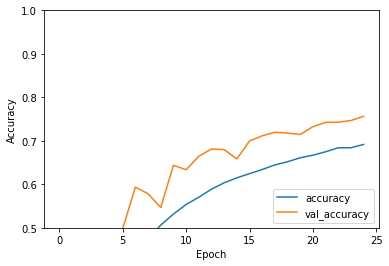

In [51]:
plt.plot(model_history.history['accuracy'], label='accuracy')
plt.plot(model_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')